**Initialization**

In [2]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

**Task 1: Data set**

Investigation of the dataset.

170500096/170498071 [==============================] - 6s 0us/step
Training inputs shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test inputs shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


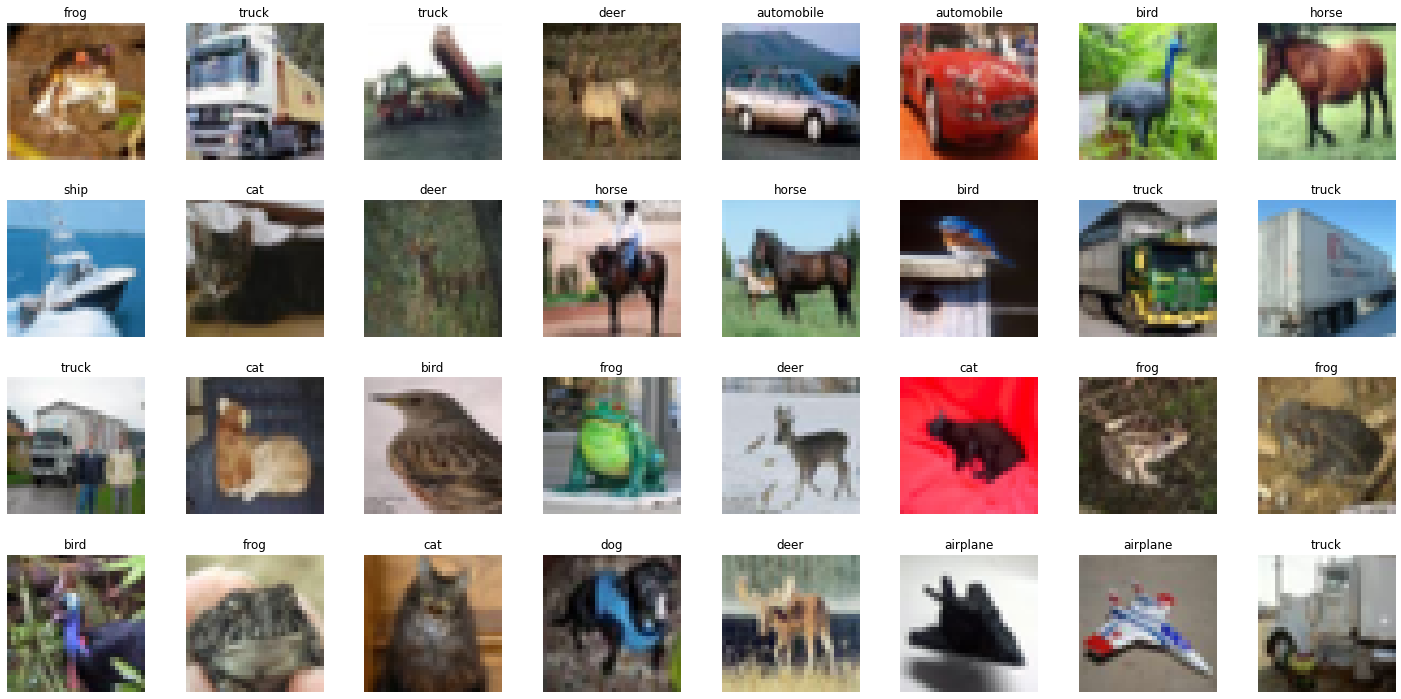

In [3]:
(training_inputs, training_labels), (test_inputs, test_labels) = tf.keras.datasets.cifar10.load_data()

print("Training inputs shape: " + str(training_inputs.shape))
print("Training labels shape: " + str(training_labels.shape))
print("Test inputs shape: " + str(test_inputs.shape))
print("Test labels shape: " + str(test_labels.shape))

label_encoding = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, ax = plt.subplots(4, 8, figsize=(20,10))
fig.tight_layout()
ax = ax.flatten()
for i in range(32):
  image = training_inputs[i]
  label = label_encoding[training_labels[i][-1]]

  ax[i].imshow(image)
  ax[i].set_title(label)
  ax[i].axis("off")

Input pipeline.

In [4]:
batch_size = 64

# Creates tensorflow datasets for the training and test data.
training_dataset = tf.data.Dataset.from_tensor_slices((training_inputs, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_inputs, test_labels))

# Conducts the normalization of the inputs (images) and the one-hot-encoding of the targets.
training_dataset = training_dataset.map(lambda inp, tar: ((2*(inp/255)-1), tf.one_hot(tf.squeeze(tar), 10))) 
test_dataset = test_dataset.map(lambda inp, tar: ((2*(inp/255)-1), tf.one_hot(tf.squeeze(tar), 10)))              # tf.squeeze(tar) to remove dimensions of size 1 from the shape of the target-tensors.
                                                                                                                  # Otherwise the shapes of prediction and target won't have the same dimension when calculating the loss.
# Batches, shuffles and prefetches the training- and test datasets.
training_dataset = training_dataset.batch(batch_size).shuffle(buffer_size = batch_size).prefetch(128)
test_dataset = test_dataset.batch(batch_size).shuffle(buffer_size = batch_size).prefetch(128)

**Task 2: Model**

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

# Description: The class Model describes a convolutional neural network with a feature extractor and 
#              a classifier.
#              @class variables: -
#              @object variables: conv_1, max_pool_1, conv_2, max_pool_2, conv_3, max_pool_3, conv_4, 
#                                 max_pool_4, global_pool, output
#              @functions: call
class Model(Model): 
  
  def __init__(self):
    super(Model, self).__init__()
    
    # Feature extractor
    self.conv_1 = tf.keras.layers.Conv2D(filters = 80,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,   # Initialization of the weights with the glorot normal distribution.
                                         bias_initializer = 'zeros',                                 # Initialization of the biases as zero.
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01),
                                         input_shape = (32, 32, 3))
    self.batch_norm_1 = tf.keras.layers.BatchNormalization()         # Batch Normalization to normalize the drives of the layer.
    self.activ_1 = tf.keras.activations.relu                         # Activation function after applying the batch normalization.
    self.max_pool_1 = tf.keras.layers.MaxPool2D(padding = 'same') 
    self.dropout_1 = tf.keras.layers.Dropout(rate = 0.3)             # Dropout after applying the Max 2D Pooling.
    self.conv_2 = tf.keras.layers.Conv2D(filters = 100,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,
                                         bias_initializer = 'zeros',
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))
    self.batch_norm_2 = tf.keras.layers.BatchNormalization()
    self.activ_2 = tf.keras.activations.relu
    self.max_pool_2 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.conv_3 = tf.keras.layers.Conv2D(filters = 120,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,
                                         bias_initializer = 'zeros',
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))
    self.batch_norm_3 = tf.keras.layers.BatchNormalization()
    self.activ_3 = tf.keras.activations.relu
    self.max_pool_3 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.dropout_3 = tf.keras.layers.Dropout(rate = 0.4)
    self.conv_4 = tf.keras.layers.Conv2D(filters = 120,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,
                                         bias_initializer = 'zeros',
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))
    self.batch_norm_4 = tf.keras.layers.BatchNormalization()
    self.activ_4 = tf.keras.activations.relu
    self.max_pool_4 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.conv_5 = tf.keras.layers.Conv2D(filters = 100,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,
                                         bias_initializer = 'zeros',
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))
    self.batch_norm_5 = tf.keras.layers.BatchNormalization()
    self.activ_5 = tf.keras.activations.relu
    self.max_pool_5 = tf.keras.layers.MaxPool2D(padding = 'same')
    self.dropout_5 = tf.keras.layers.Dropout(rate = 0.3)
    self.conv_6 = tf.keras.layers.Conv2D(filters = 80,
                                         kernel_size = 3,
                                         activation = None,
                                         padding = 'same',
                                         kernel_initializer = tf.keras.initializers.glorot_normal,
                                         bias_initializer = 'zeros',
                                         kernel_regularizer = tf.keras.regularizers.L2(0.01))
    self.batch_norm_6 = tf.keras.layers.BatchNormalization()  
    self.activ_6 = tf.keras.activations.relu
    self.max_pool_6 = tf.keras.layers.MaxPool2D(padding = 'same')

    # Classifier
    self.global_pool = tf.keras.layers.GlobalAveragePooling2D()    
    self.dropout_7 = tf.keras.layers.Dropout(rate = 0.5)       
    self.output_layer = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)


  # Description: This function conducts one forward-step of the model. 
  #              The python decorator @tf.function is used to bundle multiple computations into one computational graph.
  #              @parameters: (input) x, training
  #              @returns: (prediction) x
  @tf.function
  def call(self, x, training = True):
      x = self.conv_1(x)
      x = self.batch_norm_1(x, training)
      x = self.activ_1(x)
      x = self.max_pool_1(x)
      x = self.dropout_1(x, training)
      x = self.conv_2(x)
      x = self.batch_norm_2(x, training)
      x = self.activ_2(x)
      x = self.max_pool_2(x)
      x = self.conv_3(x)
      x = self.batch_norm_3(x, training)
      x = self.activ_3(x)
      x = self.max_pool_3(x)
      x = self.dropout_3(x, training)
      x = self.conv_4(x)
      x = self.batch_norm_4(x, training)
      x = self.activ_4(x)
      x = self.max_pool_4(x)
      x = self.conv_5(x)
      x = self.batch_norm_5(x, training)
      x = self.activ_5(x)
      x = self.max_pool_5(x)
      x = self.dropout_5(x, training)
      x = self.conv_6(x)
      x = self.batch_norm_6(x, training)
      x = self.activ_6(x)
      x = self.max_pool_6(x)    

      x = self.global_pool(x)
      x = self.dropout_7(x, training)
      x = self.output_layer(x)
      return x

**Task 3: Training**

In [6]:
# Description: This function trains an object of the class Model. It conducts a forward-step and the backpropagation 
#              throughout the network. Additionally, it determines the average training loss and accuracy.
#              @parameters: model, training_data, loss_fn, optimizer, training (to differ between training and test call of the CNN)
#              @returns: training_loss, training_accuracy
def training_step(model, training_data, loss_fn, optimizer, training = True):
  training_losses = []
  training_accuracies = []

  for (input, target) in training_data:
    with tf.GradientTape() as tape:
      prediction = model(input, training)
      current_training_loss = loss_fn(target, prediction) + tf.math.reduce_sum(model.losses)   # Sum of all L2 layer regularization losses is added to the loss.
      gradients = tape.gradient(current_training_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    training_losses.append(current_training_loss.numpy())

    current_training_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    training_accuracies.append(np.mean(current_training_accuracy))  
  
  training_loss = np.mean(training_losses)
  training_accuracy = np.mean(training_accuracies)
  return training_loss, training_accuracy


# Description: This function determines the average test loss and accuracy of an object of the class Model.
#              @parameters: model, test_data, loss_fn, training (to differ between training and test call of the CNN)
#              @returns: test_loss, test_accuracy
def test(model, test_data, loss_fn, training = False):
  test_losses = []
  test_accuracies = []

  for (input, target) in test_data:
    prediction = model(input, training)
    
    current_test_loss = loss_fn(target, prediction)
    test_losses.append(current_test_loss.numpy())

    current_test_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    test_accuracies.append(np.mean(current_test_accuracy))   
    
  test_loss = np.mean(test_losses)
  test_accuracy = np.mean(test_accuracies)
  return test_loss, test_accuracy

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4


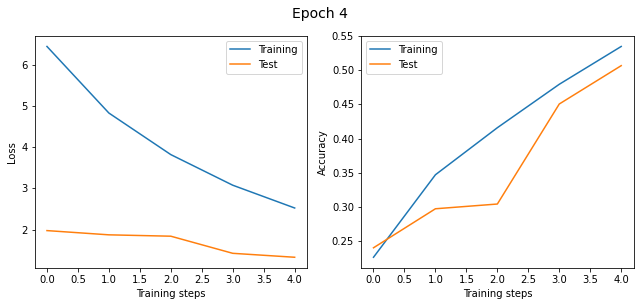

Epoch 5


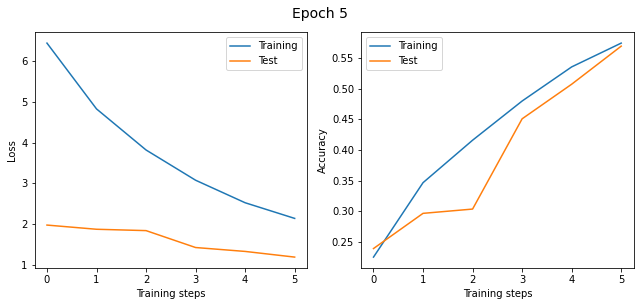

Epoch 6
Epoch 7
Epoch 8


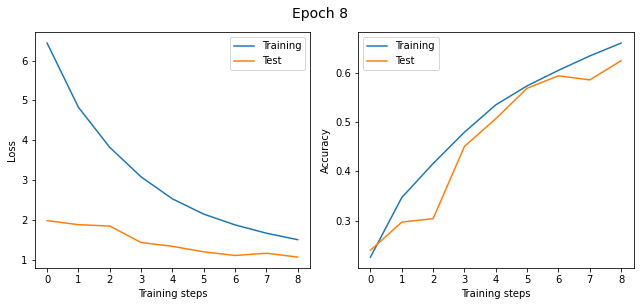

Epoch 9


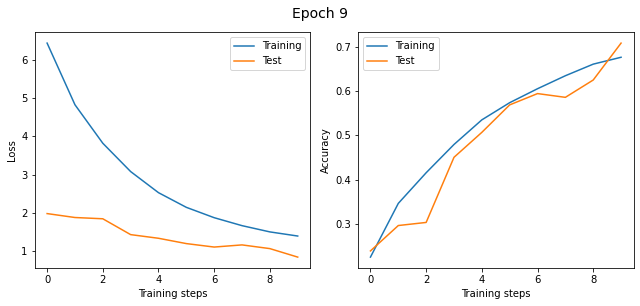

Epoch 10


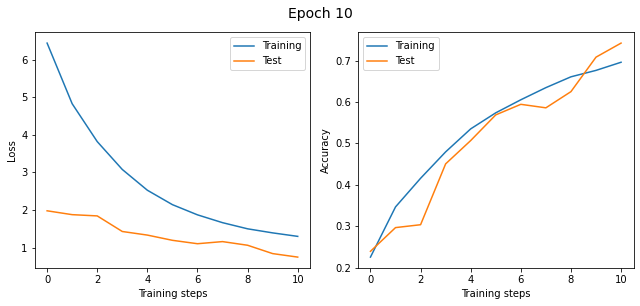

Epoch 11


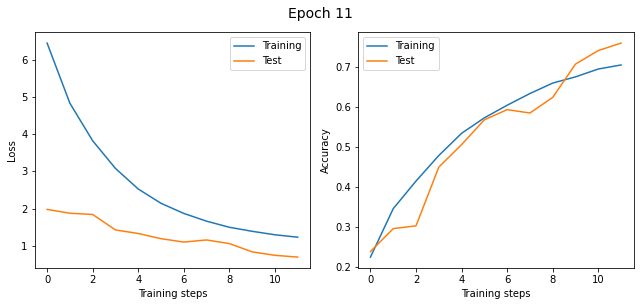

Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24


KeyboardInterrupt: ignored

In [7]:
# Description: This part creates an object of the class Model called model and executes the training and testing of the model in the training and test loop. The training 
#              takes place over an amount of epochs (n_epochs) with a predefined learning rate. The loss function defines the kind of loss-calculation. The optimizer 
#              is needed to adjust the gradients in the training steps. Moreover, the data for the visualization of the training and test progress is collected.
tf.keras.backend.clear_session()

model = Model()
n_epochs = 150
learning_rate = 0.0001
loss_fn = tf.keras.losses.CategoricalCrossentropy()                    # CategoricalCrossentropy because of 10 labels to differ.
optimizer = tf.keras.optimizers.Adam(learning_rate, amsgrad = True)    # Optimizer Adam (Adaptive Moment Estimation) with AMSGrad activated.

training_losses = []
training_accuracies = []
test_losses = []
test_accuracies = []

dynamic_threshold_train_visio = 0.5    # Test accuracy threshold from which the training progress is displayed.
# Training and test loop
for epoch in range(n_epochs):
    print('Epoch ' + str(epoch))

    training_loss, training_accuracy = training_step(model, training_dataset, loss_fn, optimizer, training = True)
    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)

    test_loss, test_accuracy = test(model, test_dataset, loss_fn, training = False)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Visualization during training to check how the CNN is doing. In 5% steps of the test accuracy starting up from 50% test accuracy.
    if test_accuracy >= dynamic_threshold_train_visio: 
      fig, ax = plt.subplots(1,2, figsize=(9, 4))

      fig.suptitle(('Epoch ' + str(epoch)), fontsize=14, y=1.05)
      line1, = ax[0].plot(training_losses)
      line2, = ax[0].plot(test_losses)
      ax[0].set_xlabel("Training steps")
      ax[0].set_ylabel("Loss")
      ax[0].legend((line1, line2),("Training", "Test"))

      line1, = ax[1].plot(training_accuracies)
      line2, = ax[1].plot(test_accuracies)
      ax[1].set_xlabel("Training steps")
      ax[1].set_ylabel("Accuracy")
      ax[1].legend((line1, line2),("Training", "Test"))

      fig.tight_layout()
      plt.draw()
      plt.show()

      # Increases the test accuracy threshold by 5%.  
      dynamic_threshold_train_visio += 0.05

**Task 4: Visualization**

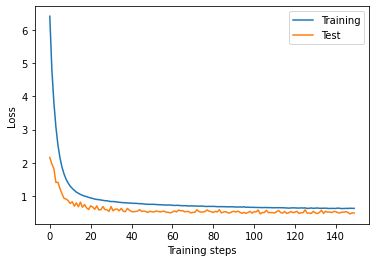

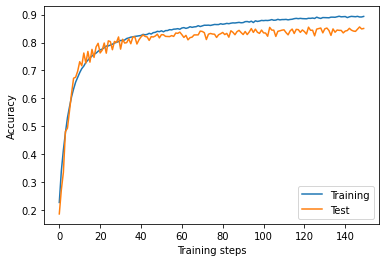

0: 0.18660429936305734
1: 0.2727906050955414
2: 0.3351910828025478
3: 0.48158837579617836
4: 0.49363057324840764
5: 0.556031050955414
6: 0.6175358280254777
7: 0.6722730891719745
8: 0.6758558917197452
9: 0.697452229299363
10: 0.7313893312101911
11: 0.716859076433121
12: 0.7624402866242038
13: 0.7265127388535032
14: 0.7681130573248408
15: 0.729796974522293
16: 0.7754777070063694
17: 0.7466162420382165
18: 0.7840366242038217
19: 0.7971735668789809
20: 0.7627388535031847
21: 0.7726910828025477
22: 0.7981687898089171
23: 0.7619426751592356
24: 0.806031050955414
25: 0.8032444267515924
26: 0.7742834394904459
27: 0.8038415605095541
28: 0.800656847133758
29: 0.8199641719745223
30: 0.7764729299363057
31: 0.8115047770700637
32: 0.7981687898089171
33: 0.7996616242038217
34: 0.8132961783439491
35: 0.7956807324840764
36: 0.8195660828025477
37: 0.8203622611464968
38: 0.7946855095541401
39: 0.8096138535031847
40: 0.8199641719745223
41: 0.8271297770700637
42: 0.8219546178343949
43: 0.8201632165605095
4

In [ ]:
# Description: Figure 1 shows the loss for each epoch during the training and testing of the model.
#              Figure 2 shows the accuracy for each epoch during the training and testing of the model.
plt.figure()
line1, = plt.plot(training_losses)
line2, = plt.plot(test_losses)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend((line1, line2),("Training", "Test"))
plt.show()

plt.figure()
line1, = plt.plot(training_accuracies)
line2, = plt.plot(test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.legend((line1, line2),("Training", "Test"))
plt.show()

for epoch, test_acc in enumerate(test_accuracies):
   print("Epoch " + str(epoch) + " test accuracy: " + str(test_acc))